Branching GP Regression: Sampling from the model
--

*Alexis Boukouvalas, 2017*

This notebook shows how to sample from a BGP model

In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
import gpflow
from BranchedGP import VBHelperFunctions as bplot
from BranchedGP import BranchingTree as bt
from BranchedGP import branch_kernParamGPflow as bk
plt.style.use('ggplot')
%matplotlib inline

/Users/mqbssaby/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Create the tree
Specify where the branching point is

In [2]:
branchingPoint = 0.5
tree = bt.BinaryBranchingTree(0, 10, fDebug=False)  # set to true to print debug messages
tree.add(None, 1, branchingPoint)  # single branching point
(fm, fmb) = tree.GetFunctionBranchTensor()

Specify where to evaluate the kernel

In [3]:
t = np.linspace(0.01, 1, 10)
(XForKernel, indicesBranch, Xtrue) = tree.GetFunctionIndexList(t, fReturnXtrue=True)

Specify the kernel and its hyperparameters
These determine how smooth and variable the branching functions are

In [4]:
Bvalues = np.expand_dims(np.asarray(tree.GetBranchValues()), 1)
KbranchParam = bk.BranchKernelParam(gpflow.kernels.RBF(1), fm, b=Bvalues)
KbranchParam.kern.lengthscales = 2
KbranchParam.kern.variance = 1

Sample the kernel

In [5]:
samples = bk.SampleKernel(KbranchParam, XForKernel)

Plot the sample

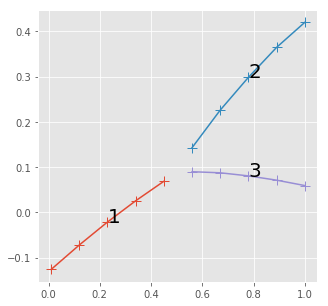

In [6]:
bk.PlotSample(XForKernel, samples)

You can rerun the same code as many times as you want and get different sample paths

We can also sample independent functions. This is the assumption in the overlapping mixtures of GPs model (OMGP) discussed in the paper.

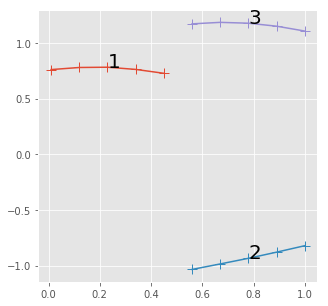

In [7]:
indKernel = bk.IndKern(gpflow.kernels.RBF(1))
samples = bk.SampleKernel(indKernel, XForKernel)
bk.PlotSample(XForKernel, samples)